### Laura Muñoz Hernández A01167497

Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

Este es un dataset que tiene como objetivo determinar si una persona puede ser susceptible a crédito o no de acuerdo a un conjunto de variables

In [39]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

### Descripción de los datos

In [40]:
df = pd.read_csv(url)

In [41]:
df.shape

(30000, 25)

In [42]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [43]:
columns = ['ID',
            'Amount_credit',
            'Gender',
            'Education',
            'Marital_status',
            'Age',
            'Repayment status in September',
            'Repayment status in August',
            'Repayment status in July',
            'Repayment status in June',
            'Repayment status in May',
            'Repayment status in April',
            'Amount of bill statement in September',
            'Amount of bill statement in August',
            'Amount of bill statement in July',
            'Amount of bill statement in June',
            'Amount of bill statement in May',
            'Amount of bill statement in April',
            'Amount paid in September',
            'Amount paid in August',
            'Amount paid in July',
            'Amount paid in June',
            'Amount paid in May',
            'Amount paid in April',
            'Target']

In [44]:
df.columns=columns

In [45]:
df.head()

,ID,Amount_credit,Gender,Education,Marital_status,Age,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount paid in September,Amount paid in August,Amount paid in July,Amount paid in June,Amount paid in May,Amount paid in April,Target
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Las mujeres son las que solicitaron más créditos

In [83]:
df['Gender'].value_counts()

2.0    18112
1.0    11887
Name: Gender, dtype: int64

La mayor cantidad de las personas que solicitaron un crédito estudiaron la universidad 

In [84]:
df['Education'].value_counts()

2.0    14030
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: Education, dtype: int64

Los solterons son los que más solicitaron créditos

In [85]:
df['Marital_status'].value_counts()

2.0    15964
1.0    13657
3.0      323
0.0       54
Name: Marital_status, dtype: int64

In [46]:
df.describe()

,ID,Amount_credit,Gender,Education,Marital_status,Age,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount paid in September,Amount paid in August,Amount paid in July,Amount paid in June,Amount paid in May,Amount paid in April,Target
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Podemos observar que tenemos 30,000 registros y que la cantidad mínima de crédito fue de 10,000 y el máximo de 1,000,000 y la edad promedio de las personas que solicitan un crédito es de 35 años

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     30000 non-null  int64  
 1   Amount_credit                          30000 non-null  int64  
 2   Gender                                 29999 non-null  float64
 3   Education                              29998 non-null  float64
 4   Marital_status                         29998 non-null  float64
 5   Age                                    29995 non-null  float64
 6   Repayment status in September          29997 non-null  float64
 7   Repayment status in August             29995 non-null  float64
 8   Repayment status in July               29993 non-null  float64
 9   Repayment status in June               29991 non-null  float64
 10  Repayment status in May                29984 non-null  float64
 11  Re

### Eliminar valores nulos

In [48]:
df_nulls = df.dropna()

In [49]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     29958 non-null  int64  
 1   Amount_credit                          29958 non-null  int64  
 2   Gender                                 29958 non-null  float64
 3   Education                              29958 non-null  float64
 4   Marital_status                         29958 non-null  float64
 5   Age                                    29958 non-null  float64
 6   Repayment status in September          29958 non-null  float64
 7   Repayment status in August             29958 non-null  float64
 8   Repayment status in July               29958 non-null  float64
 9   Repayment status in June               29958 non-null  float64
 10  Repayment status in May                29958 non-null  float64
 11  Re

In [50]:
scaler = StandardScaler()
print(scaler.fit(df_nulls))

StandardScaler()


<AxesSubplot:xlabel='Marital_status', ylabel='Age'>

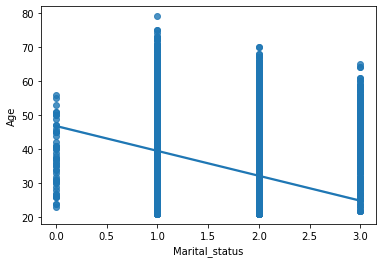

In [51]:
r = sns.regplot(data = df_nulls,  
                x = df_nulls.Marital_status, 
                y = df_nulls.Age
               ) 
r

In [52]:
ndf = df_nulls[['Marital_status', 'Age']]
ndf.corr()

,Marital_status,Age
Marital_status,1.000000,-0.413926
Age,-0.413926,1.000000


In [53]:
df_nulls.Marital_status.mean().round(2)

1.55

In [54]:
df_nulls.Age.mean().round(2)

35.48

In [55]:
Variance = np.cov([df_nulls.Marital_status, df_nulls.Age])
Variance

array([[ 0.27243397, -1.99074799],
       [-1.99074799, 84.90367153]])

In [56]:
ndf = df[['Marital_status','Age']]
ndf.var().sum()

85.24442036100372

In [57]:
t= ndf.var().sum()
varMarital =Variance[0][0]
varAge = Variance[1][1]

In [58]:
print('Total Variance \t\t\t:', t.round(2) )
print('Varience prop. of Marital Status \t:', ((varMarital/t)*100).round(2),'%' )
print('Varience prop. of Age            \t:', ((varAge/t)*100).round(2),'%' )

Total Variance 			: 85.24
Varience prop. of Marital Status 	: 0.32 %
Varience prop. of Age            	: 99.6 %


<AxesSubplot:xlabel='Amount_credit', ylabel='Age'>

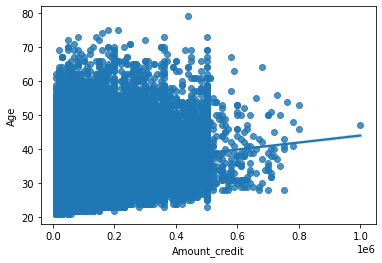

In [61]:
p = sns.regplot(data = df_nulls,  
                x = df_nulls.Amount_credit, 
                y = df_nulls.Age
               ) 
p

In [65]:
Variance2 = np.cov([df_nulls.Amount_credit, df_nulls.Age])
Variance2

array([[1.68317668e+10, 1.72759143e+05],
       [1.72759143e+05, 8.49036715e+01]])

In [66]:
ndf2 = df_nulls[['Amount_credit', 'Age']]
ndf2.corr()

,Amount_credit,Age
Amount_credit,1.000000,0.144515
Age,0.144515,1.000000


In [67]:
ndf2 = df_nulls[['Amount_credit','Age']]
ndf2.var().sum()

16831766859.488377

In [68]:
t2= ndf2.var().sum()
varAmount =Variance2[0][0]
varAge2 = Variance2[1][1]

In [69]:
ndf2 = df_nulls[['Amount_credit','Age']]
ndf2.var().sum()

16831766859.488377

In [70]:
t2= ndf2.var().sum()
varAmount =Variance2[0][0]
varAge2 = Variance2[1][1]

In [71]:
print('Total Varience \t\t\t:', t2.round(2) )
print('Varience prop. of Amount \t:', ((varAmount/t2)*100).round(2),'%' )
print('Varience prop. of Age    \t:', ((varAge2/t2)*100).round(2),'%' )

Total Varience 			: 16831766859.49
Varience prop. of Amount 	: 100.0 %
Varience prop. of Age    	: 0.0 %


In [76]:
from sklearn import preprocessing
pd.set_option('display.max_columns',None)

Observamos que requerimos de por lo menos los primeros 13 componentes para explicar más del 90% de la varianza

In [78]:
pcs = PCA()
pcs.fit(preprocessing.scale(df_nulls.iloc[:, 1:-1].dropna(axis=0))) 
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5581,2.0243,1.2454,1.2131,1.0128,0.9783,0.9528,0.9422,0.9335,0.8849,0.8560,0.8259,0.7556,0.7243,0.6354,0.5097,0.4992,0.4345,0.3632,0.2649,0.2020,0.1590,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,0.0319,0.0297,0.0248,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4627,0.5301,0.5941,0.6387,0.6803,0.7198,0.7584,0.7962,0.8303,0.8622,0.8918,0.9166,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt

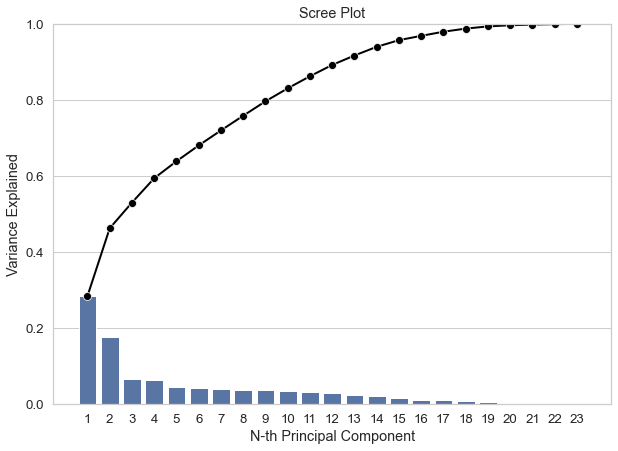

In [80]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [81]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_nulls.iloc[:, 1:-1].columns
                                )
pcsComponents_df.iloc[:,:13]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Amount_credit,0.068513,0.316364,0.017300,0.069526,-0.150030,-0.375095,0.106564,-0.059519,0.021914,0.017330,0.008608,-0.097753,0.359992
Gender,-0.021586,0.030205,0.024284,-0.078109,0.883357,-0.396295,0.065237,-0.027989,0.019138,0.023981,-0.009356,0.057416,0.176851
Education,0.019167,-0.091513,-0.316638,0.246490,0.365704,0.563608,-0.400609,0.080516,-0.156240,0.062782,0.001826,-0.185169,0.084609
Marital_status,-0.005612,-0.043043,0.453725,-0.443931,-0.053225,0.280022,-0.160569,0.026316,-0.056505,0.038759,-0.010357,-0.142041,0.666526
Age,0.014262,0.066656,-0.463023,0.462041,-0.164345,-0.088112,0.081440,-0.012669,0.047052,0.008012,-0.021446,-0.048505,0.577125
Repayment status in September,0.161183,-0.298260,-0.017384,0.016395,-0.035463,-0.039066,-0.086692,0.021131,-0.030753,0.003439,0.044480,0.623610,0.156214
Repayment status in August,0.194171,-0.334879,0.017808,0.050119,-0.037997,-0.060660,-0.091881,0.015266,-0.033568,0.006629,0.028042,0.376411,0.081480
Repayment status in July,0.200348,-0.343802,0.061514,0.084101,-0.023945,-0.069601,-0.020974,-0.026630,-0.011472,-0.024926,-0.106814,0.100277,0.051691
Repayment status in June,0.207166,-0.344508,0.088704,0.109227,-0.007883,-0.087272,0.039403,-0.056142,0.044599,-0.057006,-0.007062,-0.211043,0.018232
Repayment status in May,0.211029,-0.331488,0.108582,0.115438,0.001892,-0.087219,0.104041,-0.033713,0.054854,0.066757,0.010431,-0.358645,-0.023265


En el caso de la primera variable (el monto del crédito), vemos que la mayoría de las observaciones tienen valores menores a 800,000 dólares taiwaneses; sin embargo, hay algunos puntos atípicos cercanos al millón

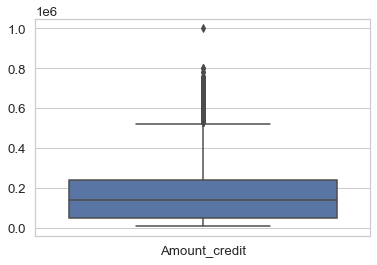

In [82]:
ax = sns.boxplot(data=df_nulls.iloc[:, 1:2])